In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

In [61]:
train=pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv',encoding="utf-8")

In [62]:
test=pd.read_csv('/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv',encoding="utf-8")

In [63]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [64]:
train.shape

(31962, 3)

In [65]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [66]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


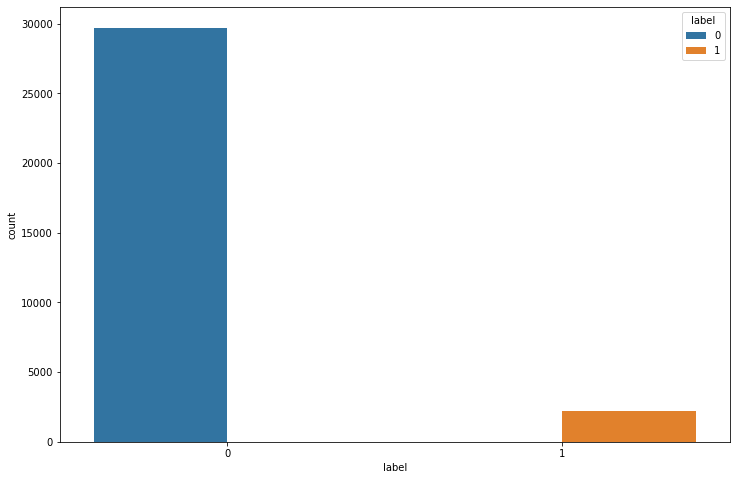

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,8))
sns.countplot(x='label',data=train,hue='label')


In [69]:
train['number_words']=train['tweet'].apply(lambda x:len(str(x).split()))

In [70]:
test['number_words']=test['tweet'].apply(lambda x:len(str(x).split()))

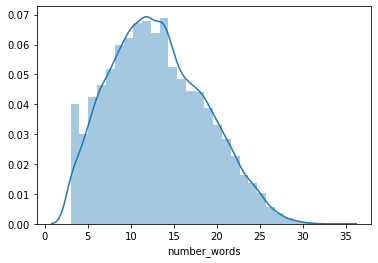

In [71]:
sns.distplot(train['number_words'],bins=30)

In [72]:
sns.__version__

'0.10.0'

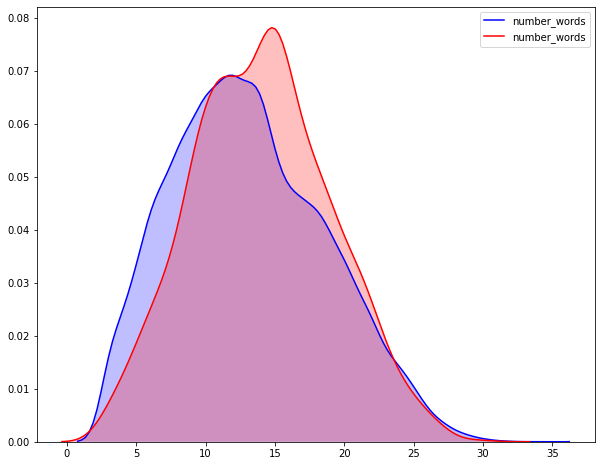

In [73]:
plt.figure(figsize=(10,8))
p1=sns.kdeplot(train[train['label']==0]['number_words'],shade=True,color='b')
p2=sns.kdeplot(train[train['label']==1]['number_words'],shade=True,color='r')

In [74]:
train['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [75]:
import nltk
lemma = nltk.WordNetLemmatizer()
stopwords=nltk.corpus.stopwords.words('english')
import re
import string

In [76]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [77]:
def cleantext(x):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , x.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets
def remove_stopword(x):
    tokens=re.split('\W+',x)
   #removal of stopwords from the tokenixed text
    text=[lemma.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [79]:
train['clean_data']=train['tweet'].apply(lambda x:cleantext(x))
test['clean_data']=test['tweet'].apply(lambda x:cleantext(x))

In [80]:
train['clean_data'][2:20]

2                                   bihday your majesty
3         model i love u take with u all the time in ur
4                     factsguide society now motivation
5     huge fan fare and big talking before they leav...
6                                camping tomorrow danny
7     the next school year is the year for exam can ...
8     we won love the land allin cavs champion cleve...
9                           welcome here i m it s so gr
10    ireland consumer price index mom climbed from ...
11    we are so selfish orlando standwithorlando pul...
12           i get to see my daddy today day gettingfed
13    cnn call michigan middle school build the wall...
14    no comment in australia opkillingbay seashephe...
15          ouch junior is angry got junior yugyoem omg
16    i am thankful for having a paner thankful posi...
17                                 retweet if you agree
18    it friday smile all around via ig user cooky m...
19    a we all know essential oil are not made o

In [81]:
train['clean_text']=train['clean_data'].apply(lambda x:remove_stopword(x))
test['clean_text']=test['clean_data'].apply(lambda x:remove_stopword(x))


In [82]:
train.head()

,id,label,tweet,number_words,clean_data,clean_text
0,1,0,@user when a father is dysfunctional and is s...,18,when a father is dysfunctional and is so selfi...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,19,thanks for lyft credit i can t use cause they ...,"[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0,bihday your majesty,3,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,14,model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,4,factsguide society now motivation,"[factsguide, society, motivation]"


In [83]:
from collections import Counter

top=Counter([item for sublist in train['clean_text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

,Common_words,count
1,love,2875
2,amp,1777
3,u,1737
4,happy,1707
5,life,1268
6,time,1262
7,like,1222
8,today,1106
9,get,1003
10,new,1003


In [84]:
import plotly.express as px

In [85]:
figure=px.treemap(df,path=['Common_words'],values='count')
figure.show()

## Most common words sentiment wise


In [86]:
train.head()

,id,label,tweet,number_words,clean_data,clean_text
0,1,0,@user when a father is dysfunctional and is s...,18,when a father is dysfunctional and is so selfi...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,19,thanks for lyft credit i can t use cause they ...,"[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0,bihday your majesty,3,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,14,model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,4,factsguide society now motivation,"[factsguide, society, motivation]"


In [87]:
Positive_sent=train[train['label']==0]
Racist_sent=train[train['label']==1]

In [88]:
top=Counter([item for sublist in Positive_sent['clean_text'] for item in sublist])
df_pos=pd.DataFrame(top.most_common(20))
df_pos=df_pos.iloc[1:,:]
df_pos.columns=['Common_words','count']
df_pos.style.background_gradient(cmap='OrRd')

,Common_words,count
1,love,2845
2,happy,1695
3,u,1642
4,amp,1477
5,life,1253
6,time,1232
7,today,1089
8,like,1082
9,get,952
10,thankful,952


In [89]:
top=Counter([item for sublist in Racist_sent['clean_text'] for item in sublist])
df_racist=pd.DataFrame(top.most_common(20))
df_racist=df_racist.iloc[1:,:]
df_racist.columns=['Common_words','count']
df_racist.style.background_gradient(cmap='Greens')

,Common_words,count
1,trump,217
2,white,156
3,black,149
4,libtard,149
5,like,140
6,woman,122
7,racist,114
8,politics,97
9,people,95
10,u,95


In [90]:
figure=px.treemap(df_racist,path=['Common_words'],values='count')
figure.show()

Lets try to print WORD-CLOUD
==

In [91]:
word_data_race=Racist_sent['clean_text']
word_data_race[1:10]

14     [comment, australia, opkillingbay, seashepherd...
17                                      [retweet, agree]
23                            [lumpy, say, prove, lumpy]
34     [unbelievable, st, century, need, something, l...
56                             [let, fight, love, peace]
68     [white, establishment, blk, folx, running, aro...
77     [hey, white, people, call, people, white, race...
82     [altright, u, amp, insecurity, lure, men, whit...
111    [interested, linguistics, address, race, amp, ...
Name: clean_text, dtype: object

In [92]:
def words(data):
    all_words=[]
    for text in data:
        text=[x.strip(string.punctuation) for x in text]
        all_words.append(text)

    final=[" ".join(text)for text in all_words]
    final_data=" ".join(final)
    return final_data

In [93]:
final_racist=words(word_data_race)


In [94]:
from wordcloud import WordCloud

In [95]:
def word_cloud(x):
    #function to print word cloud
    wordcloud = WordCloud(background_color="black").generate(x)
    plt.figure(figsize = (10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

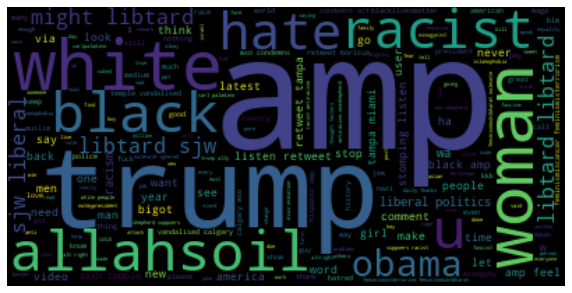

In [96]:
word_cloud(final_racist)

In [97]:
word_data_pos=Positive_sent['clean_text']
word_data_pos[0:10]

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                    [bihday, majesty]
3                  [model, love, u, take, u, time, ur]
4                    [factsguide, society, motivation]
5    [huge, fan, fare, big, talking, leave, chaos, ...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exam, think, school...
8    [love, land, allin, cavs, champion, cleveland,...
9                                        [welcome, gr]
Name: clean_text, dtype: object

In [98]:
final_pos=words(word_data_pos)

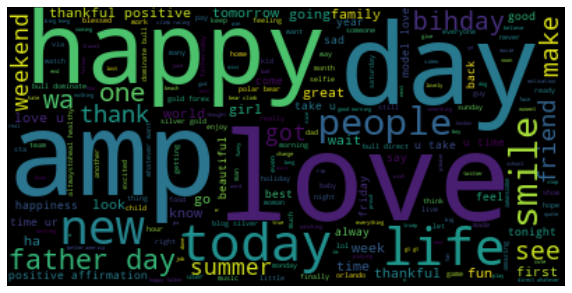

In [99]:
word_cloud(final_pos)

Recurrent neural network
====

In [100]:
# training the tokenizer and use tokenizer to convert the sentences to sequences of numbers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [101]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['clean_data'])
X_train_seq = tokenizer.texts_to_sequences(train['clean_data'])
X_test_seq = tokenizer.texts_to_sequences(test['clean_data'])


In [102]:
train_seq_padded = pad_sequences(X_train_seq, 50)
test_seq_padded = pad_sequences(X_test_seq, 50)

In [103]:
df1=pd.DataFrame(train['number_words'])
df2=pd.DataFrame(test['number_words'])

In [104]:
from scipy.sparse import hstack
train_rnn= hstack((train_seq_padded,df1))
test_rnn= hstack((test_seq_padded,df2))

In [105]:
print(train_rnn.shape,test_rnn.shape)
y_train=train['label']

(31962, 51) (17197, 51)


In [129]:
len(tokenizer.index_word)

35251

In [130]:
import keras
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
#instantiating our neural network model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 50))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          1762600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,774,313
Trainable params: 1,774,313
Non-trainable params: 0
_________________________________________________________________


In [131]:
train_data=train_rnn.toarray()
test_data=test_rnn.toarray()

In [132]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

In [134]:
history = model.fit(train_data,
                    y_train,
                    batch_size=50, 
                    epochs=10)

Epoch 1/10
640/640 [==============================] - 23s 35ms/step - loss: 0.1176 - accuracy: 0.9597 - precision_1: 0.8076 - recall_1: 0.5580
Epoch 2/10
640/640 [==============================] - 22s 34ms/step - loss: 0.0559 - accuracy: 0.9816 - precision_1: 0.9078 - recall_1: 0.8211
Epoch 3/10
640/640 [==============================] - 21s 34ms/step - loss: 0.0294 - accuracy: 0.9907 - precision_1: 0.9555 - recall_1: 0.9099
Epoch 4/10
640/640 [==============================] - 22s 35ms/step - loss: 0.0167 - accuracy: 0.9944 - precision_1: 0.9747 - recall_1: 0.9442
Epoch 5/10
640/640 [==============================] - 23s 35ms/step - loss: 0.0120 - accuracy: 0.9963 - precision_1: 0.9801 - recall_1: 0.9665
Epoch 6/10
640/640 [==============================] - 22s 34ms/step - loss: 0.0082 - accuracy: 0.9973 - precision_1: 0.9865 - recall_1: 0.9750
Epoch 7/10
640/640 [==============================] - 21s 33ms/step - loss: 0.0066 - accuracy: 0.9979 - precision_1: 0.9883 - recall_1: 0.9822

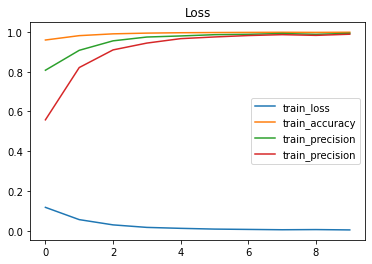

In [135]:
plt.title('Loss')
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['precision_1'],label='train_precision')
plt.plot(history.history['recall_1'],label='train_precision')
plt.legend()
plt.show()

In [113]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [ ]:
model.save('Rnn_model.h5')

### By the end of 10 th epoch we got the below results:
Epoch 10/10
loss: 0.0032 - accuracy: 0.9991 - precision: 0.9951 - recall: 0.9924

In [136]:
from sklearn.metrics import precision_score
y_pred = model.predict(test_data,verbose=1)


538/538 [==============================] - 4s 7ms/step


In [137]:
test['Predicted labels_rnn']=pd.DataFrame(y_pred)

Random forest classifier
=====

TF-IDF vectoriztion
======

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1, 2),min_df=2,max_features=1000)
tfidf.fit(train['clean_data'])
tfidf_df=tfidf.transform(train['clean_data']).toarray()
print('shape',tfidf_df.shape)

shape (31962, 1000)


In [44]:
tfidf_test=tfidf.transform(test['clean_data']).toarray()

In [47]:
y_train=train['label']

In [46]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
train_feat= hstack((tfidf_df,df1))
test_feat=hstack((tfidf_test,df2))
print(train_feat.shape)
print(test_feat.shape)

(31962, 1001)
(17197, 1001)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def gridcv(train_feat,test_feat,y_train):
    parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    model= GridSearchCV(RandomForestClassifier(), param_grid=parameters, n_jobs=-1,scoring='accuracy',cv=5)
    model.fit(train_feat, y_train)
    print('Best Estimator:      ',model.best_estimator_)
    print('Optimal parameters:  ',model.best_params_)
    print('optimal score:       ',model.best_score_*(100))
    print('-------------------------------------------------')

    model.best_estimator_.fit(train_feat, y_train)
    y_pred = model.best_estimator_.predict(test_feat)
    return y_pred

In [54]:
pred_y=gridcv(tfidf_df,tfidf_test,y_train)

Best Estimator:       RandomForestClassifier(max_depth=10)
Optimal parameters:   {'max_depth': 10}
optimal score:        93.39215324098028
-------------------------------------------------


In [56]:
test['predicted_y']=pred_y

In [58]:
test['predicted_y'].value_counts()

0    17139
1       58
Name: predicted_y, dtype: int64